# 1. LDA (Analyse Discriminante Linéaire) : Une méthode qui réduit la dimension des données tout en maximisant la séparation entre les classes.
#    LDA est particulièrement utile lorsque nous avons des étiquettes de classes et que nous souhaitons réduire la dimensionnalité tout en préservant l'information discriminative.
# 2. T-SNE (t-distributed Stochastic Neighbor Embedding) : Méthode non-linéaire qui est utilisée pour la visualisation de données de haute dimension dans un espace de faible dimension
#    Il est particulièrement utile pour découvrir des structures complexes de données.
# 3. UMAP (Uniform Manifold Approximation and Projection) : Une autre technique non-linéaire utilisée pour la réduction de dimensionnalité, offrant souvent de meilleurs résultats que T-SNE en termes de préservation des structures globales.


In [3]:
pip install umap-learn # installation de la bibliothèque umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


# Librairies nécessaires

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #importer LinearDiscriminantAnalysis
from sklearn.manifold import TSNE   # importer  TSNE
import matplotlib.pyplot as plt # importer matplotlib.pyplot
import pandas as pd # importer pandas
from sklearn.datasets import make_classification  #importer make_classification
import numpy as np # importer numpy
from itertools import combinations # importer combinations
import umap # importer umap

# Jeux de données

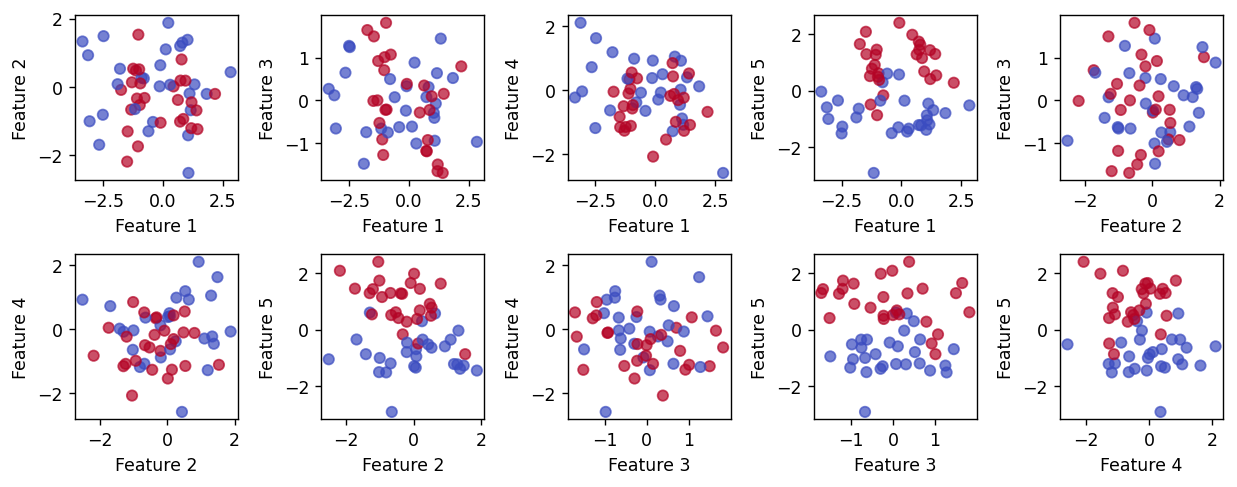

In [15]:
n_features = 5 # fixer le nombre de caracteristiques à 5
n_samples = 55 # fixer le nombre d'échantillon à 55
random_state = 58 # fixer le random pour avoir les memes resulats à chaque execution

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=2, # nombre de caracteristiques informatiques
    n_classes=2, # nombre de classes dans la variable cible
    random_state=random_state,
    n_redundant=0,# pas de données redondants
    n_repeated=0 # pas de données en repetition
)# generer un jeu de données synthétique

# Visualisation des données suivant différentes paires d'axes
fig = plt.figure(dpi=125, figsize=(10,4))# créer une figure de largeur 10, hauteur 4 et une resolution de 125
for i, v in enumerate(combinations(np.arange(n_features),2)):# parcourir toutes les paires possibles de caractéristiques
    ax = fig.add_subplot(2,  n_features, i+1)# diviser la figure en 2 lignes et n_features colonnes
    a, b = v # extraire les élements du paire
    ax.scatter(X[:, a], X[:, b], c=y, cmap='coolwarm', alpha=0.7) # tracer scatter
    ax.set_xlabel('Feature '+str(a+1)) # label des abscisses
    ax.set_ylabel('Feature '+str(b+1)) # label des ordonnées

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()# faire des espaces entre les sous-graphes
plt.show()# afficher les graphes

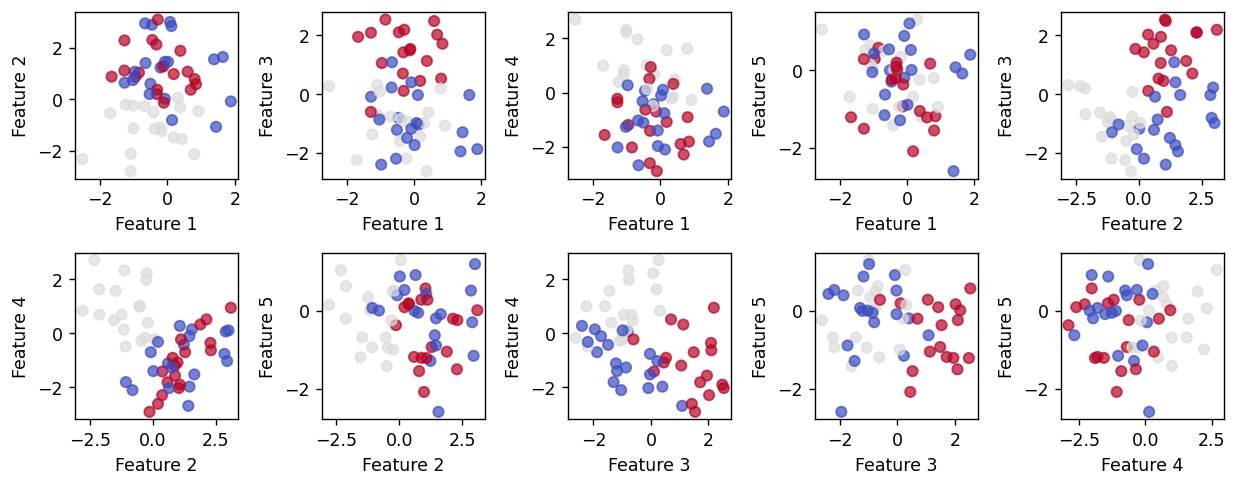

In [16]:
X1, y1 = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=3,
    n_classes=3,
    random_state=random_state,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1# nombre de cluster par classe
)

fig = plt.figure(dpi=125, figsize=(10, 4))# créer une figure de largeur 10, hauteur 4 et une resolution de 125
for i, v in enumerate(combinations(np.arange(n_features), 2)):
    ax = fig.add_subplot(2, n_features, i + 1)
    a, b = v
    ax.scatter(X1[:, a], X1[:, b], c=y1, cmap='coolwarm', alpha=0.7)
    ax.set_xlabel('Feature ' + str(a + 1))
    ax.set_ylabel('Feature ' + str(b + 1))


plt.tight_layout()
plt.show()

# 1. LDA
Projection des données dans un espace latent. Cet espace dépend du nombre de classes.
Il est important de noter que la projection ne peut que se faire sur au plus nombre de classes - 1 dimensions latentes.

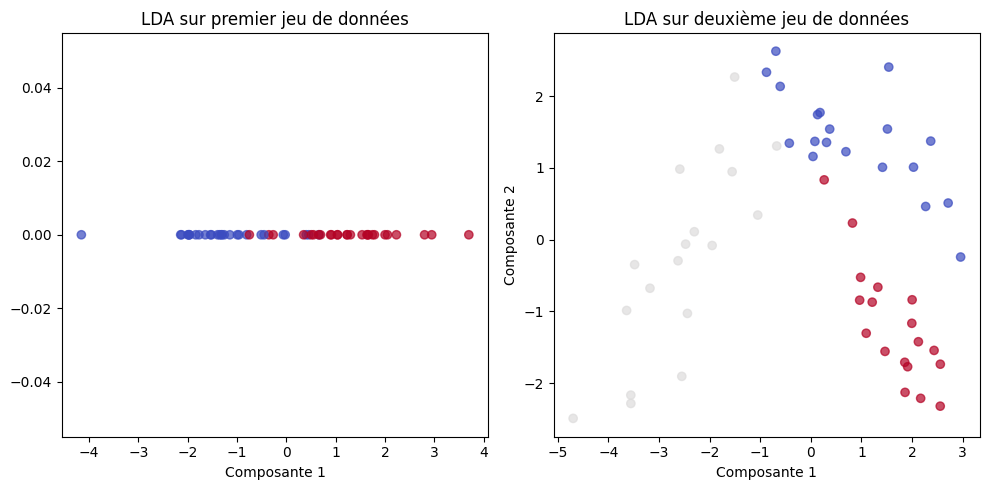

In [17]:
lda = LinearDiscriminantAnalysis(n_components=1) # projection dans un espace latent de dimension 1
X_lda = lda.fit_transform(X, y) # instanciation de l'objet lda
lda2 = LinearDiscriminantAnalysis(n_components=2) # projection dans un espace latent de dimension 2
X_lda2 = lda2.fit_transform(X1, y1) # instanciation de l'objet lda2

fig = plt.figure(dpi=100, figsize=(10,5)) # créer une figure de largeur 10, hauteur 5 et une resolution de 100
ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)# diviser la figure en 2 colonnes
ax1.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm', alpha=0.7) # tracer une graphe scatter sur zero
ax1.set_xlabel('Composante 1')
ax1.set_title('LDA sur premier jeu de données')#donner le titre au graphe

ax2.scatter(X_lda2[:,0], X_lda2[:,1], c=y1, cmap='coolwarm', alpha=0.7)
ax2.set_xlabel('Composante 1')
ax2.set_ylabel('Composante 2')
ax2.set_title('LDA sur deuxième jeu de données')#donner le titre au graphe

plt.tight_layout()
plt.show()

# 2. T-SNE (t-distributed Stochastic Neighbor Embedding)

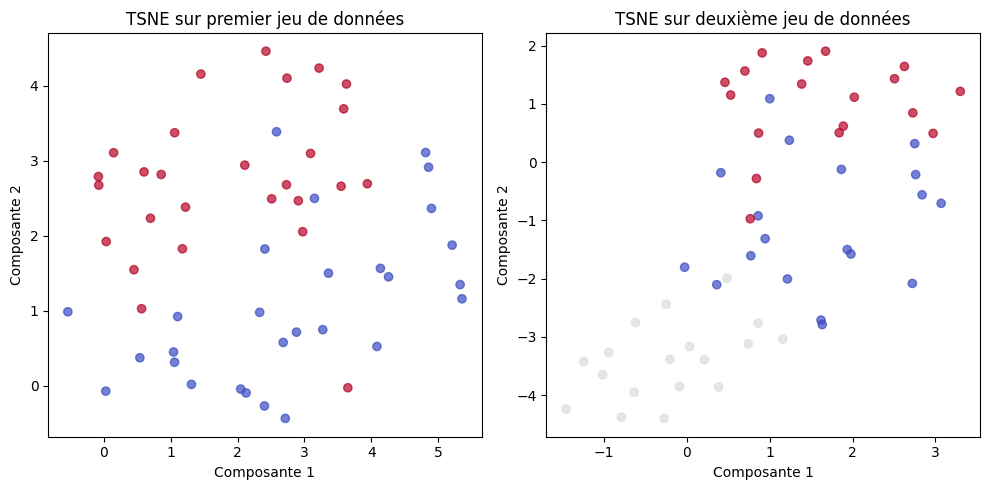

In [18]:
tsne = TSNE(n_components=2, random_state=random_state)# projection dans un espace latent de dimension 2

X_tsne = tsne.fit_transform(X)# instanciation de l'objet sur X

X_tsne2 = tsne.fit_transform(X1)# instanciation de l'objet sur X1

fig = plt.figure(dpi=100, figsize=(10,5)) # créer une figure de largeur 10, hauteur 5 et une resolution de 100
ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm', alpha=0.7)
ax1.set_xlabel('Composante 1')
ax1.set_ylabel('Composante 2')
ax1.set_title('TSNE sur premier jeu de données')

ax2.scatter(X_tsne2[:,0], X_tsne2[:,1], c=y1, cmap='coolwarm', alpha=0.7)
ax2.set_xlabel('Composante 1')
ax2.set_ylabel('Composante 2')
ax2.set_title('TSNE sur deuxième jeu de données')

plt.tight_layout()
plt.show()

# 3. UMAP (Uniform Manifold Approximation and Projection)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


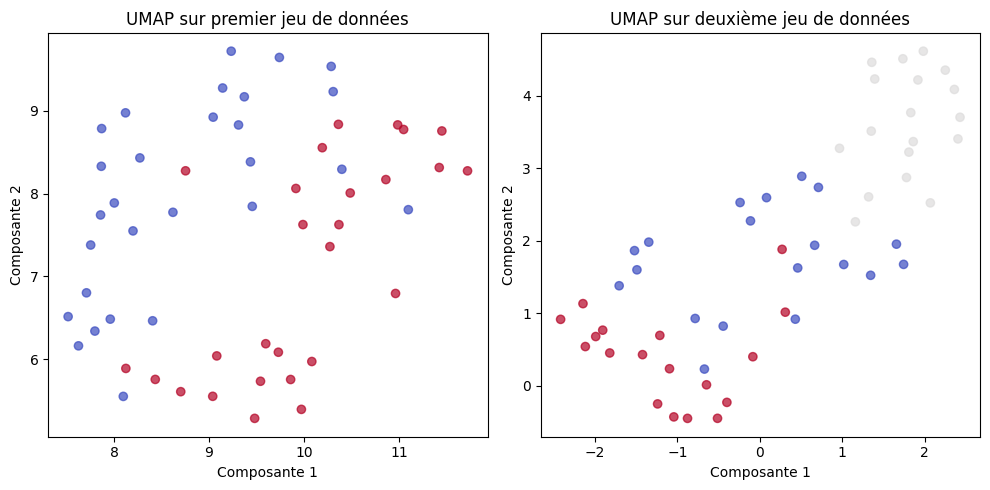

In [19]:
umap_model = umap.UMAP(n_components=2, random_state=42)# projection dans un espace latent de dimension 2


X_umap = umap_model.fit_transform(X) # instanciation de l'objet sur X

X_umap2 = umap_model.fit_transform(X1) # instanciation de l'objet sur X1

fig = plt.figure(dpi=100, figsize=(10,5))
ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
ax1.scatter(X_umap[:,0], X_umap[:,1], c=y, cmap='coolwarm', alpha=0.7)
ax1.set_xlabel('Composante 1')
ax1.set_ylabel('Composante 2')
ax1.set_title('UMAP sur premier jeu de données')

ax2.scatter(X_umap2[:,0], X_umap2[:,1], c=y1, cmap='coolwarm', alpha=0.7)
ax2.set_xlabel('Composante 1')
ax2.set_ylabel('Composante 2')
ax2.set_title('UMAP sur deuxième jeu de données')

plt.tight_layout()
plt.show()


**Tâche à réaliser : Extraction des Caractéristiques**

**Contexte :** Dans cette tâche, vous utiliserez un jeu de données appelé gene_expression_cancer (disponible sur moodle). L'objectif de cette activité est d'appliquer des méthodes d'extraction de caractéristiques via ADL, TSNE et UMAP.

Vous devez vous assurez que les différentes classes soient coloriées dans vos nuages points comme les exemples présentés lors de l'atelier.

## <div class="alert alert-block alert-info">Vous devez retourner ce notebook avec les commentaires sur l'ensemble du code y compris la partie faite durant la séance de l'atelier !</div>

In [11]:
from sklearn.preprocessing import LabelEncoder

**Chargement des jeux de données**



**1.   Le chargement des jeux de données des caractéristiques**



In [8]:
data = pd.read_csv("/content/drive/MyDrive/Atelier 3/TCGA-PANCAN-HiSeq-801x20531/data.csv")
data= data.drop(data.columns[0], axis=1)


**2.   Le chargement des jeux de données de la variable cible**



In [9]:
labels = pd.read_csv("/content/drive/MyDrive/Atelier 3/TCGA-PANCAN-HiSeq-801x20531/labels.csv")
labels= labels.drop(labels.columns[0], axis=1)



**Encodage de la variable categorique labels**

In [12]:
label_encoder = LabelEncoder() # objet de labelEncoder
labels["class_Label"] = label_encoder.fit_transform(labels["Class"]) # transforme les valeurs de Sexe par label_encoder


# 1. LDA


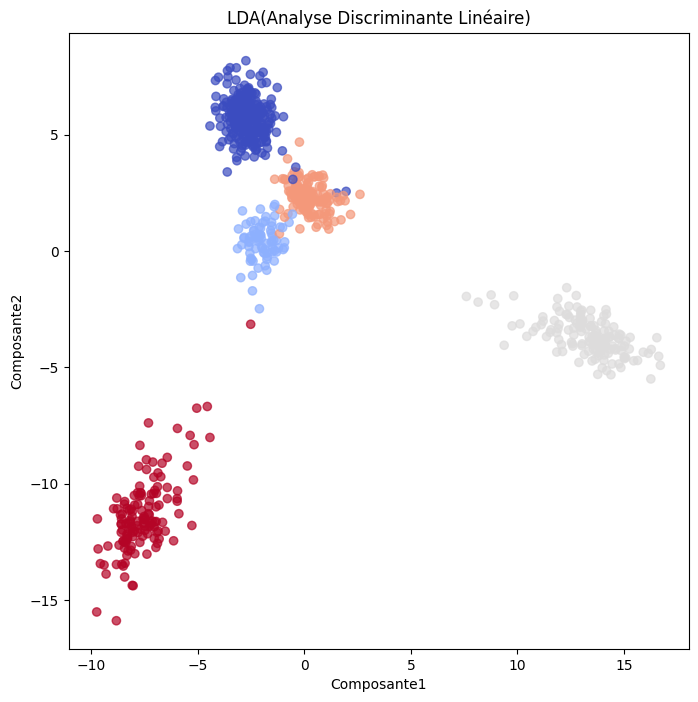

In [13]:
numclasses=labels["class_Label"].unique()
if len(numclasses)>2:
 lda = LinearDiscriminantAnalysis(n_components=2) # projection dans un espace latent de dimension 2
 X_lda = lda.fit_transform(data,labels["class_Label"] ) # instanciation de l'objet lda
 plt.figure(figsize=(8, 8))# fixe la taille de la figure
 plt.scatter(X_lda[:,0],X_lda[:,1], c=labels["class_Label"], cmap='coolwarm', alpha=0.7) # tracer une graphe scatter
 plt.title('LDA(Analyse Discriminante Linéaire)')#crée le titre à la figure
 plt.xlabel('Composante1') #étiquette de l'axe x
 plt.ylabel('Composante2') # étiquette de l'axe y
 plt.show()# affiche la figure
else:
   lda = LinearDiscriminantAnalysis(numclasses-1) # projection dans un espace latent de dimension 2
   X_lda = lda.fit_transform(data,labels["class_Label"] ) # instanciation de l'objet lda
   plt.figure(figsize=(8, 8))# fixe la taille de la figure
   plt.scatter(X_lda[:,0],X_lda[:,1], c=labels["class_Label"], cmap='coolwarm', alpha=0.7) # tracer une graphe scatter
   plt.title('LDA')#crée le titre à la figure
   plt.xlabel('Composante1') #étiquette de l'axe x
   plt.ylabel('Composante2') # étiquette de l'axe y
   plt.show()# affiche la figure



# 2. T-SNE (t-distributed Stochastic Neighbor Embedding)

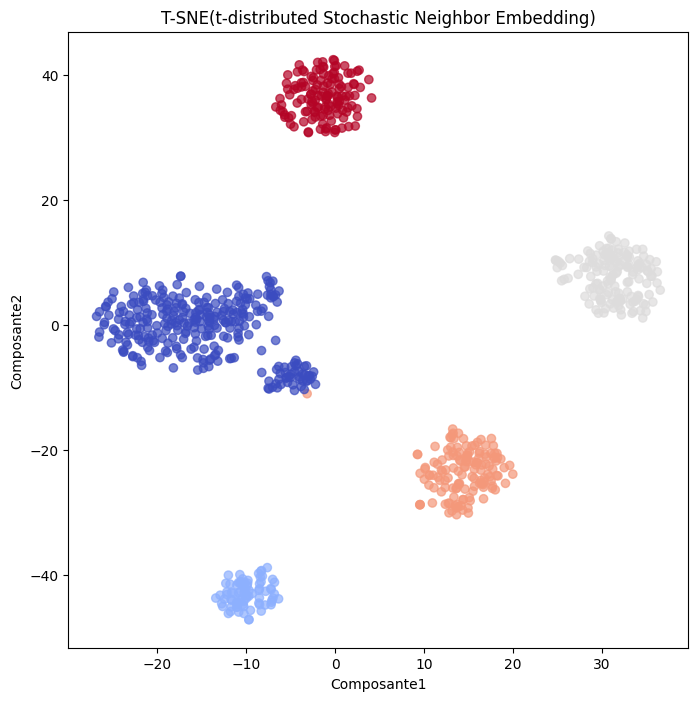

In [20]:
tsne = TSNE(n_components=2, random_state=random_state)# projection dans un espace latent de dimension 2
data_tsne = tsne.fit_transform(data)# instanciation de l'objet sur data

plt.figure(figsize=(8, 8))# fixe la taille de la figure
plt.scatter(data_tsne[:,0],data_tsne[:,1], c=labels["class_Label"], cmap='coolwarm', alpha=0.7) # tracer une graphe scatter
plt.title('T-SNE(t-distributed Stochastic Neighbor Embedding)')#crée le titre à la figure
plt.xlabel('Composante1') #étiquette de l'axe x
plt.ylabel('Composante2') # étiquette de l'axe y
plt.show()# affiche la figure

# 3. UMAP (Uniform Manifold Approximation and Projection)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


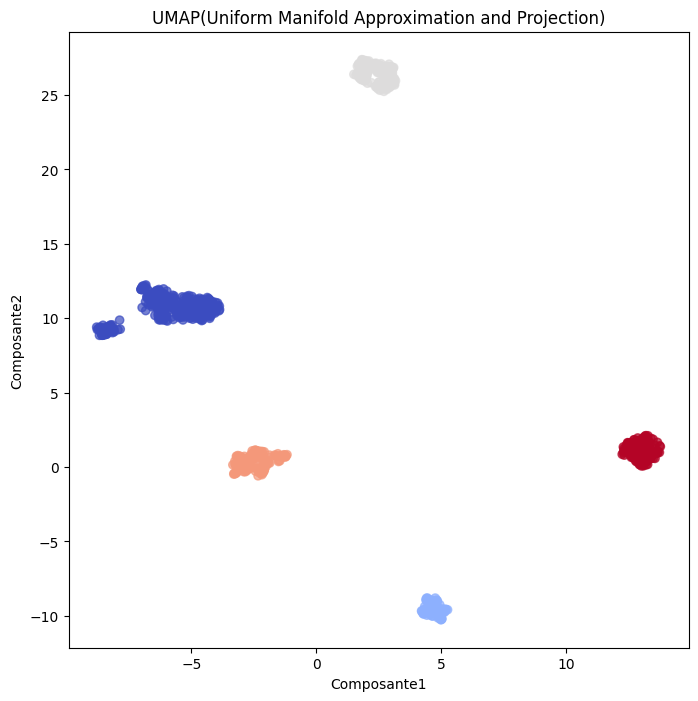

In [21]:
umap_model = umap.UMAP(n_components=2, random_state=42)# projection dans un espace latent de dimension 2
data_umap = umap_model.fit_transform(data) # instanciation de l'objet sur data

plt.figure(figsize=(8, 8))# fixe la taille de la figure
plt.scatter(data_umap[:,0],data_umap[:,1], c=labels["class_Label"], cmap='coolwarm', alpha=0.7) # tracer une graphe scatter
plt.title('UMAP(Uniform Manifold Approximation and Projection)')#crée le titre à la figure
plt.xlabel('Composante1') #étiquette de l'axe x
plt.ylabel('Composante2') # étiquette de l'axe y
plt.show()# affiche la figure

**Merci beaucoup pour toutes les explications que vous nous donner!!!**